# Tensors
(Taken and slightly modified from PyTorch official tutorial https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for **automatic differentiation** (we'll see more about that later in the [Autograd](autogradqs_tutorial.html)_
section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

In [ ]:
import torch
import numpy as np

## Initializing a Tensor

**Directly from data**

Tensors can be created directly from python list. The data type is automatically inferred.



In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays.



In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

y_ones = x_data.new_ones((1,2))  # retains the properties of x_data, but with a different size
print(f"Ones Tensor: \n {y_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Ones Tensor: 
 tensor([[1, 1]]) 

Random Tensor: 
 tensor([[0.8140, 0.9975],
        [0.2747, 0.4374]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [ ]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
custom_tensor = torch.empty(shape).fill_(5)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")
print(f"Custom Tensor: \n {custom_tensor}")

Random Tensor: 
 tensor([[0.6031, 0.9020, 0.0404],
        [0.2544, 0.5725, 0.2110]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Custom Tensor: 
 tensor([[5., 5., 5.],
        [5., 5., 5.]])


--------------




## Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively on PyTorch's documentation [here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    print("GPU is available on this machine")
    tensor = tensor.to("cuda")
print(f"Device tensor is stored on: {tensor.device}")

GPU is available on this machine
Device tensor is stored on: cuda:0


If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining op that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Arithmetic operations**



In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
print('Matrix multiplication:')
print(torch.matmul(tensor, tensor.T, out=y3))


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
print('Element-wise product')
print(torch.mul(tensor, tensor, out=z3))

Matrix multiplication:
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
Element-wise product
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


**In-place operations**
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.</p></div>



--------------





## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



### Tensor to NumPy array



In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor



In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.


In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


--------------





# Deep Learning with PyTorch
(taken and slightly modified from PyTorch official tutorial https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py)

## Deep Learning Building Blocks: Affine maps, non-linearities and objectives

Deep learning consists of composing linearities with non-linearities in
clever ways. The introduction of non-linearities allows for powerful
models. In this section, we will play with these core components, make
up an objective function, and see how the model is trained.


### Affine Maps

One of the core workhorses of deep learning is the affine map, which is
a function $f(x)$ where

\begin{align}f(x) = xA^T + b\end{align}

for a matrix $A$ and vectors $x, b$. The parameters to be
learned here are $A$ and $b$. Often, $b$ is refered to
as the *bias* term.


PyTorch and most other deep learning frameworks do things a little
differently than traditional linear algebra. It maps the rows of the
input instead of the columns. That is, the $i$'th row of the
output below is the mapping of the $i$'th row of the input under
$A$, plus the bias term. Look at the example below.


In [ ]:
# Author: Robert Guthrie

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b

# data is 2x5.
data = torch.randn(2, 5)
print('input:')
print(data)
print('weight:')
print(lin.weight)
print('output:')
print(lin(data))
print('manual calculation:')
print(torch.matmul(data, lin.weight.T) + lin.bias)

input:
tensor([[-1.1948,  0.0250, -0.7627,  1.3969, -0.3245],
        [ 0.2879,  1.0579,  0.9621,  0.3935,  1.1322]])
weight:
Parameter containing:
tensor([[ 0.2304, -0.1974, -0.0867,  0.2099, -0.4210],
        [ 0.2682, -0.0920,  0.2275,  0.0622, -0.0548],
        [ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326]], requires_grad=True)
output:
tensor([[ 0.1755, -0.3268, -0.5069],
        [-0.6602,  0.2260,  0.1089]], grad_fn=<AddmmBackward0>)
manual calculation:
tensor([[ 0.1755, -0.3268, -0.5069],
        [-0.6602,  0.2260,  0.1089]], grad_fn=<AddBackward0>)


### Non-Linearities

Non-linear activation functions are necessary in building a neural network. Without the non-linear activations, for any n-layered neural network, we can find its equal single-layered neural network substitute.

There are a few core non-linear actication functions.
$\tanh(x), \sigma(x), \text{ReLU}(x)$ are the most common. You are
probably wondering: "why these functions? I can think of plenty of other
non-linearities." The reason for this is that they have gradients that
are easy to compute, and computing gradients is essential for learning. The complete list of non-linear functions that PyTorch supported can be seen [here](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

In [ ]:
# In pytorch, most non-linearities are in torch.functional (we have it imported as F)
# Note that non-linearites typically don't have parameters like affine maps do.
# That is, they don't have weights that are updated during training.
data = torch.randn(2, 2)
print(data)
print(F.relu(data))

tensor([[-0.5404, -2.2102],
        [ 2.1130, -0.0040]])
tensor([[0.0000, 0.0000],
        [2.1130, 0.0000]])


### Softmax and Probabilities

The function $\text{Softmax}(x)$ is also just a non-linearity, but
it is special in that it usually is the last operation done in a
network. This is because it takes in a vector of real numbers and
returns a probability distribution. Its definition is as follows. Let
$x$ be a vector of real numbers (positive, negative, whatever,
there are no constraints). Then the i'th component of
$\text{Softmax}(x)$ is

\begin{align}\frac{\exp(x_i)}{\sum_j \exp(x_j)}\end{align}

It should be clear that the output is a probability distribution: each
element is non-negative and the sum over all components is 1.

You could also think of it as just applying an element-wise
exponentiation operator to the input to make everything non-negative and
then dividing by the normalization constant.




In [ ]:
# Softmax is also in torch.nn.functional
data = torch.randn(5)
print(data)
print(F.softmax(data, dim=0))
print(F.softmax(data, dim=0).sum())  # Sums to 1 because it is a distribution!
print(F.log_softmax(data, dim=0))  # there's also log_softmax

tensor([ 1.3800, -1.3505,  0.3455,  0.5046,  1.8213])
tensor([0.2948, 0.0192, 0.1048, 0.1228, 0.4584])
tensor(1.)
tensor([-1.2214, -3.9519, -2.2560, -2.0969, -0.7801])


## Example Task: Language Identification

Let's write an annotated example of a network that takes in a sparse
bag-of-words representation and outputs a probability distribution over
two labels: "English" and "Spanish". We will use a simple model, just logistic
regression, but implemented in PyTorch. Let's first define the task and the data, then we see how we build the model, compute the loss function, and update the parameters by backpropagation.

In [ ]:
data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]

### Data Representation
Neural network only deals with numerical data. If you have textual input, you need to convert it into a numerical input. The same goes for categorical labels. Let's make our data numerical by first mapping each word and label into the word index and label index

In [ ]:
# word_to_ix maps each word in the vocab to a unique integer, which will be its
# index into the Bag of words vector
word_to_ix = {}
for sent, _ in data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

label_to_ix = {}
for _, label in data:
    if label not in label_to_ix:
        label_to_ix[label] = len(label_to_ix)

VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = len(label_to_ix)
print(label_to_ix)

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22}
{'SPANISH': 0, 'ENGLISH': 1}


There are many ways to represent textual feature for machine learning training. One of the most popular feature representation that we have learned is bag-of-words. Here, we will convert the input data into a tensor of bag of words and the label into a tensor of label indices.

In [ ]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        if word in word_to_ix:
            vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

### Creating Network Components in PyTorch

All network components should inherit from nn.Module and override the
forward() method. That is about it, as far as the boilerplate is
concerned. Inheriting from nn.Module provides functionality to your
component.

To accelerate the training, we should place our model in the GPU instead of the CPU. We can do that with the same ``.to(device)`` command that we have learned in the Tensor section. After that command is invoked, all modules and tensors that are initialized in the constructor (______init__) of the model will be placed in GPU. However, note that new tensors that are initialized in other locations (e.g., ``forward`` function) will by default be stored in CPU.

In [ ]:
class BoWClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, vocab_size):
        # calls the init function of nn.Module.  Dont get confused by syntax,
        # just always do it in an nn.Module
        super(BoWClassifier, self).__init__()

        # Define the parameters that you will need.  In this case, we need A and b,
        # the parameters of the affine mapping.
        # Torch defines nn.Linear(), which provides the affine map.
        # Make sure you understand why the input dimension is vocab_size
        # and the output is num_labels!
        self.linear = nn.Linear(vocab_size, num_labels)

        # NOTE! The non-linearity log softmax does not have parameters! So we don't need
        # to worry about that here

    def forward(self, bow_vec):
        # Pass the input through the linear layer,
        # then pass that through log_softmax.
        # Many non-linearities and other functions are in torch.nn.functional
        return F.log_softmax(self.linear(bow_vec), dim=1)

model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# the model knows its parameters.  The first output below is A, the second is b.
# Whenever you assign a component to a class variable in the __init__ function
# of a module, which was done with the line
# self.linear = nn.Linear(...)
# Then through some Python magic from the PyTorch devs, your module
# (in this case, BoWClassifier) will store knowledge of the nn.Linear's parameters
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.1270,  0.0647, -0.1348,  0.1354,  0.1266,  0.1849, -0.1169, -0.0343,
         -0.0040,  0.0305, -0.1582, -0.1480,  0.1134, -0.0489,  0.1019,  0.0119,
          0.0685,  0.0458,  0.0758,  0.1034, -0.1931,  0.1050, -0.1466],
        [-0.1573,  0.0127, -0.0355,  0.1225, -0.1208, -0.1854,  0.1518, -0.0309,
          0.1173,  0.0670, -0.1564,  0.0419,  0.0501, -0.1396, -0.0989,  0.0711,
          0.0373, -0.0887, -0.0631,  0.1910, -0.0386,  0.1176,  0.0903]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1348, -0.1773], device='cuda:0', requires_grad=True)


### Training Procedure

The deep learning training goal is to minimize the objective function of the network (in which case it is often called a *loss function*
or *cost function*). This proceeds by:
1. Choose a training instance.
2. Run it through your neural network.
3. Compute the loss of the output.
4. Update the parameters of the model are by taking the derivative of the loss function.

Intuitively,
- If your model is very confident in its answer, and its answer is wrong, your loss will be high.
- If your model is very confident in its answer, and its answer is correct, the loss will be low.
- If your model is not very confident in its answer, it's somewhere in between.

The idea behind minimizing the loss function on your training examples
is that your network will **hopefully generalize well** and have small loss
on unseen examples in your dev set, test set, or in production. An
example loss function is the [*negative log likelihood loss*](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html), which is a
very common objective for multi-class classification. For supervised
multi-class classification, this means training the network to minimize
the negative log probability of the correct output (or equivalently,
maximize the log probability of the correct output).

In [ ]:
loss_function = nn.NLLLoss() # similar to cross entropy but accepts log-probabilities as input

### Optimization

What do we do with the loss of the model? Well, since our loss is an Tensor, we can compute gradients with respect to all of the parameters used to compute it! Then we can perform standard **gradient updates**. Let $\theta$ be our parameters,
$L(\theta)$ the loss function, and $\eta$ a positive
learning rate. Then:

\begin{align}\theta^{(t+1)} = \theta^{(t)} - \eta \nabla_\theta L(\theta)\end{align}

You don't need to worry about calculating the gradient (or the derivation of the loss function), PyTorch will automatically calculate it for you (if you are curious, learn more about [PyTorch autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)).


There are a huge collection of algorithms and active research for the gradient update. Torch provides many in the [torch.optim](https://pytorch.org/docs/stable/optim.html) package, and they are all completely transparent. Using the simplest gradient update is the same as the more complicated algorithms. Trying different update algorithms and different parameters for the update algorithms (like different initial learning rates) is important in optimizing your network's performance. Often, just replacing vanilla SGD with an optimizer like Adam or RMSProp will boost performance noticably.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Training and Testing

Transform the input into the model feature, then feed it into the model to get the label (log-probabilities of the identified languages)

In [ ]:
ix_to_labels = list(label_to_ix.keys())

def test(instance, vocab):
    with torch.no_grad():
        bow_vec = make_bow_vector(instance, vocab)
        bow_vec = bow_vec.to(device)
        log_probs = model(bow_vec)
        return log_probs

# Run on test data before we train, just to see a before-and-after
for instance, label in test_data:
    log_probs = test(instance, word_to_ix)
    pred_label = ix_to_labels[torch.argmax(log_probs.squeeze()).item()]
    print(f"log probs: {log_probs}")
    print(f"predicted: {pred_label}, actual label: {label}")

# Print the matrix column corresponding to "que"
print(next(model.parameters())[:, word_to_ix["que"]])

log probs: tensor([[-0.7705, -0.6213]], device='cuda:0')
predicted: ENGLISH, actual label: SPANISH
log probs: tensor([[-0.5367, -0.8787]], device='cuda:0')
predicted: SPANISH, actual label: ENGLISH
tensor([-0.1480,  0.0419], device='cuda:0', grad_fn=<SelectBackward0>)


Predicting the test labels before the training results in the model predicting English for both sentences. Furthermore, the weights for the word _que_ are all close to 0, with a slight tendency toward being predicted as English (the first index is bigger than the 0-th index, ``0.0419 > -0.1480``).

Now, let's train the model for 100 epochs.

In [ ]:
# Usually you want to pass over the training data several times.
for epoch in range(100):
    total_loss = 0
    for instance, label in data:
        # Step 1. Remember that PyTorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Tensor as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = make_bow_vector(instance, word_to_ix).to(device)
        target = make_target(label, label_to_ix).to(device)

        # Step 3. Run our forward pass.
        log_probs = model(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
    print(f"Loss on epoch {epoch}: {total_loss:.2f}")

Loss on epoch 0: 2.33
Loss on epoch 1: 1.50
Loss on epoch 2: 1.09
Loss on epoch 3: 0.85
Loss on epoch 4: 0.70
Loss on epoch 5: 0.59
Loss on epoch 6: 0.51
Loss on epoch 7: 0.45
Loss on epoch 8: 0.40
Loss on epoch 9: 0.36
Loss on epoch 10: 0.33
Loss on epoch 11: 0.31
Loss on epoch 12: 0.28
Loss on epoch 13: 0.26
Loss on epoch 14: 0.25
Loss on epoch 15: 0.23
Loss on epoch 16: 0.22
Loss on epoch 17: 0.21
Loss on epoch 18: 0.19
Loss on epoch 19: 0.18
Loss on epoch 20: 0.18
Loss on epoch 21: 0.17
Loss on epoch 22: 0.16
Loss on epoch 23: 0.15
Loss on epoch 24: 0.15
Loss on epoch 25: 0.14
Loss on epoch 26: 0.14
Loss on epoch 27: 0.13
Loss on epoch 28: 0.13
Loss on epoch 29: 0.12
Loss on epoch 30: 0.12
Loss on epoch 31: 0.12
Loss on epoch 32: 0.11
Loss on epoch 33: 0.11
Loss on epoch 34: 0.11
Loss on epoch 35: 0.10
Loss on epoch 36: 0.10
Loss on epoch 37: 0.10
Loss on epoch 38: 0.09
Loss on epoch 39: 0.09
Loss on epoch 40: 0.09
Loss on epoch 41: 0.09
Loss on epoch 42: 0.09
Loss on epoch 43: 0.0

Let's check the performance again after training the model

In [ ]:
# Run on test data before we train, just to see a before-and-after
for instance, label in test_data:
    log_probs = test(instance, word_to_ix)
    pred_label = ix_to_labels[torch.argmax(log_probs.squeeze()).item()]
    print(f"log probs: {log_probs}")
    print(f"predicted: {pred_label}, actual label: {label}")

# Print the matrix column corresponding to "que"
print(next(model.parameters())[:, word_to_ix["que"]])

log probs: tensor([[-0.1765, -1.8214]], device='cuda:0')
predicted: SPANISH, actual label: SPANISH
log probs: tensor([[-2.3982, -0.0953]], device='cuda:0')
predicted: ENGLISH, actual label: ENGLISH
tensor([ 0.2760, -0.3821], device='cuda:0', grad_fn=<SelectBackward0>)


After training the model to convergences, the model can now predict the test sentences accurately. Now, the weight for the word _que_ have a much bigger tendency toward being predicted as Spanish (the 0-th index is much bigger than the 1st index, ``0.2760 > -0.3821``)

--------------




## Save and Load the Model
(taken and slightly modified from PyTorch official tutorial https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html)


PyTorch models store the learned parameters in an internal
state dictionary, called ``state_dict``. These can be persisted via the ``torch.save``
method:

In [ ]:
MODEL_PATH = 'model_weights.pth'
torch.save(model.state_dict(), MODEL_PATH)

To load model weights, you need to create an instance of the same model first, and then load the parameters
using ``load_state_dict()`` method.

In [ ]:
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)
model.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

As PyTorch model's ``state_dict()`` is a dictionary, we can save the model's weight with other helpful information to continue the training or to the test the model, like optimizer's ``state_dict()``, hyper-parameters, and more.

In [ ]:
checkpoint = {
              'epoch': epoch,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'loss': loss,
              }
torch.save(checkpoint, MODEL_PATH)

For a more detailed information on PyTorch's saving and loading model, please refer to https://pytorch.org/tutorials/beginner/saving_loading_models.html
(Note that this is a different link from the top one)

--------------




# Datasets and Dataloaders
To easily maintain our code, ideally we decouple the code to process the data, the code to run the training, and the model itself. PyTorch encourages users to use two of their data classes, **Dataset** and **DataLoader**.
* Dataset class is used to load the data and pre-process the data.
* DataLoader class is used to sample and aggregate the data (create the mini-batch) from the Dataset class during training and testing.
* The training/testing script will loop over the DataLoader object to get the training/testing mini-batches.






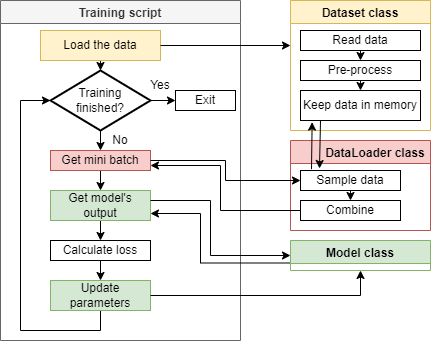


PyTorch provides many well known datasets for Computer Vision tasks (https://pytorch.org/vision/stable/datasets.html) and NLP tasks (https://pytorch.org/text/stable/datasets.html). When working with our own data, we need to create a custom dataset class that extends the PyTorch Dataset class.

When implementing our own custom dataset, the class needs to implement two functions: 
- ______len__ : the function that returns the dataset size.
- ______getitem__ : the function that accepts an index and returns the processed data in that index.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class LangDataset(Dataset):
    """
    Custom Dataset class to load and pre-process the data of
    language identification task
    """
    def __init__(self, data_path, vocab=None, is_training=True):
        # ideally load from the data_path
        raw_data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
                    ("Give it to me".split(), "ENGLISH"),
                    ("No creo que sea una buena idea".split(), "SPANISH"),
                    ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]
        self.texts = [x[0] for x in raw_data]
        self.labels = [x[1] for x in raw_data]
        if is_training:
            self.text_vocab = self.create_text_vocab(self.texts)
            self.label_vocab = self.create_label_vocab(self.labels)
        else:
            assert vocab is not None, "testing must use vocab from training"
            self.text_vocab = vocab['text']
            self.label_vocab = vocab['labels']
        
        self.texts = [self.make_bow_vector(x) for x in self.texts]
        self.labels = [self.make_target(y) for y in self.labels]


    def create_text_vocab(self, data):
        text_vocab = {}
        for sent in data:
            for word in sent:
                if word not in text_vocab:
                    text_vocab[word] = len(text_vocab)
        
        return text_vocab


    def create_label_vocab(self, data):
        label_vocab = {}
        for label in data:
            if label not in label_vocab:
                label_vocab[label] = len(label_vocab)
        
        return label_vocab


    def make_bow_vector(self, data):
        vec = torch.zeros(len(self.text_vocab))
        for word in data:
            vec[self.text_vocab[word]] += 1
        return vec.view(1, -1)


    def make_target(self, label):
        return torch.LongTensor([self.label_vocab[label]])


    def __len__(self):
        return len(self.texts)


    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        return text, label

In [ ]:
dataset = LangDataset('path_to_file')
dataset.__getitem__(0)

(tensor([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]]), tensor([0]))

Dataset object is an python iterable class, means that we can loop over the dataset object to get each of the instances

In [ ]:
for i in range(len(dataset)):
    text, label = dataset.__getitem__(i)
    print(f"Instance {i}")
    print(f"Text: {text}\nLabel: {label}\n")

Instance 0
Text: tensor([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.]])
Label: tensor([0])

Instance 1
Text: tensor([[1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.]])
Label: tensor([1])

Instance 2
Text: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0.]])
Label: tensor([0])

Instance 3
Text: tensor([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
         1., 1., 1., 1., 1.]])
Label: tensor([1])



Since all outputs of the ______getitem__ above have same shapes, we can easily create a mini batch from our dataset object by using PyTorch's DataLoader class.

In [ ]:
dataloader = DataLoader(dataset, batch_size=2)
for i, instance in enumerate(dataloader):
    text, label = instance
    print(f"Instance {i}")
    print(f"Text: {text}\nLabel: {label}\n")

Instance 0
Text: tensor([[[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])
Label: tensor([[0],
        [1]])

Instance 1
Text: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
          1., 1., 1., 1., 1., 1.]]])
Label: tensor([[0],
        [1]])



We almost never need to implement our own DataLoader class, but may need to implement our custom collator function if the dataset's ______getitem__ outputs are not in the type PyTorch tensors or have different shapes. Learn more about PyTorch Dataset and DataLoader class here: https://pytorch.org/docs/stable/data.html

# Closing
This tutorial already covers all PyTorch basics for implementing simple neural model for NLP tasks. Familiarize yourself with PyTorch [documentation](https://pytorch.org/docs/stable/index.html) to understand more about its functions and how to use them.

If you have any questions about this tutorial, you can contact me through email (mrqorib@u.nus.edu)